Using Logistic Regression to classify images of numbers in MNIST images

# Introduction
With the help of the Logistic Regression algorithm, a simple yet powerful algorithm to categorize observations into classes you can recognize digits from textual images.

We will take the first two steps to implement a Logistic Regressio algorithm to classify MNIST images.

These images are unlike the Captcha checks many websites have in place to make sure you’re not a computer trying to hack into the user accounts.

Let’s see how hard it is to let a computer recognize images of numbers.

Our research goal is to let a computer recognize images of numbers.

The data we’ll be working on is the MNIST (Mixed National Institute of Standards and Technology database) image data set. The MNIST data set is one of the most common data sets used in machine learning, as it is easy to implement, yet acts as a solid method for proving out models.

MNIST is a data set of 70,000 handwritten digits numbered 0–9. No two handwritten digits are the same, and some can be very hard to correctly classify.

The human benchmark for classifying MNIST is about 97.5% accuracy, so our goal is to beat that!

Have a look at the images of numbers below. How easy or difficult do you think it is to classify them?



<img src="MNIST_numbers.png" />
    MNIST numbers

# Retrieving Data
The MNIST images can be found in the data sets package of Scikit-learn and are already normalized for you. This way you won’t need much data preparation (step 3 of the data science process).



Imports image database

In [1]:
from sklearn.datasets import fetch_openml
#from sklearn.datasets import load_digits

Loads images

In [2]:
digits = fetch_openml('mnist_784', version = 1)
#digits = load_digits()

# Exploring Data
Working with images isn’t much different from working with other data sets.

In the case of a grey image, you put a value in every matrix entry that depicts the grey value to be shown.

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
digits.target[:5]

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

## Show the image and data

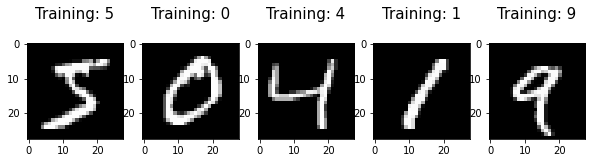

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,2))
for idx in range(5):
 image = digits.data.iloc[idx,:]
 label  = digits.target[idx] 
 plt.subplot(1, 5, idx + 1)
 plt.imshow(np.array(image).reshape(28, 28), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % int(label), fontsize = 15)

## Shows the corresponding matrix

In [6]:
digits.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
np.array(digits.data.iloc[9,:]).reshape(28, 28)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        189., 190.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

## Understand the Data

All the images in the FashionMNIST dataset are of 28x28 pixels black & white(grayscale). So there are 28x28=784 pixels per image is to be processed. And each pixel values ranges from 0 to 255. Where 0 represent Black color and 255 represent White color. The color gets lighter as we go from 0 to 255.

<img src="black_white_numbers.png" />

The combination of such pixel values make an image.

<img src="number_display.png" />

# Build a Logistic model to classify MNIST images

When passing the contents of an image into the classifier, we need to pass it a training data set so that it can start learning how to predict the numbers in the images.

Each image is also labelled with the number it actually shows.

This will build a model in memory of the most likely digit shown in an image given its grayscale values.

Once the program has gone through the training set and built the model, we can then pass it the test set of data to see how well it has learned to interpret the images using the model.

The end result of the following code is called a confusion matrix, a two-dimensional array that shows how often the number predicted was the correct number.

## Load packages

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

## Step 1: Select target variable

In [9]:
y = digits.target

In [10]:
y[0]

'5'

## Step 2: Prepare data
Reshape adapts the matrix form. This method could, for instance, turn a 10x10 matrix into 100 vectors

In [11]:
n_samples = len(digits.data)
n_samples

70000

In [12]:
X = digits.data
X.shape

(70000, 784)

## Step 3: split into test set and training set

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8 ,random_state=0)

## Step 4: Select a Linear Regression classifier 

In [14]:
lr = LogisticRegression(solver = 'lbfgs', max_iter = 100)

## Step 5: Fit the data

In [15]:
lr.fit(X_train, y_train)

C:\Users\nguye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Step 6: Predict on unseen data

In [16]:
y_pred = lr.predict(X_test)

In [17]:
y_pred

array(['0', '4', '1', ..., '7', '4', '6'], dtype=object)

Measuring Model Performance: accuracy (fraction of correct predictions): correct predictions / total number of data points

Basically, how the model performs on new data (test set)

In [18]:
score = lr.score(X_test, y_test)
print(score)

0.9172142857142858


## Step 7: Create confusion matrix

In [19]:
confusion_matrix(y_test, y_pred)

array([[1348,    0,    3,    2,    2,   11,   14,    1,    6,    0],
       [   0, 1541,    6,    5,    2,    4,    1,    5,   14,    2],
       [   6,   17, 1294,   19,   20,    4,   16,   13,   50,    4],
       [   5,    5,   50, 1261,    1,   43,    4,   13,   39,   14],
       [   2,    4,    9,    2, 1259,    2,   15,   11,    6,   40],
       [  11,    5,   12,   46,   13, 1053,   22,    7,   49,   13],
       [  13,    5,   14,    1,   16,   20, 1310,    3,    5,    0],
       [   3,    6,   21,    6,   15,    1,    1, 1347,    7,   51],
       [   4,   34,   11,   31,    9,   38,   16,    2, 1210,   13],
       [   4,    4,   10,   16,   49,    7,    1,   39,   13, 1218]],
      dtype=int64)

Note that: A confusion matrix is used to evaluate the models to ensure reproducibility of analysis. So, if you are not familiar with a confusion matrix, you can read [this article](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62) here.

The main thing you have to remember here is that the rows are the number of times that number has appeared in the test-set (0 to 9) and the columns are the number of times that number has been predicted. Confusing, right? Hence the name, confusion matrix.

In a good model, you’d expect the sum of the numbers on the main diagonal of the matrix (also known as the matrix trace) to be very high compared to the sum of all matrix entries.

So, from this confusion matrix, we can deduce that for most images, the predictions are quite accurate.

## Visualize the prediction

### Display corrected prediction

In [20]:
images_and_predictions = list(zip(digits.data, lr.predict(X)))

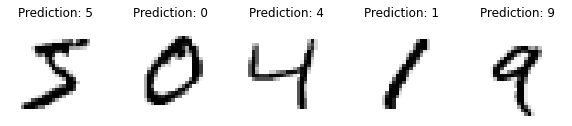

In [21]:
plt.figure(figsize=(10,2))
for idx in range(5):
    image = digits.data.iloc[idx,:]
    prediction = lr.predict(X)[idx]
    plt.subplot(1,5,idx+1)
    plt.axis("off")
    plt.imshow(np.array(image).reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % int(prediction))
plt.show()

### Display Misclassified images with Predicted Labels

In [22]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, y_pred):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

In [23]:
misclassifiedIndexes[:5]

[4, 5, 18, 61, 78]

In [24]:
y_pred[4]

'4'

In [25]:
np.array(y_test)[:5]

array(['0', '4', '1', '2', '7'], dtype=object)

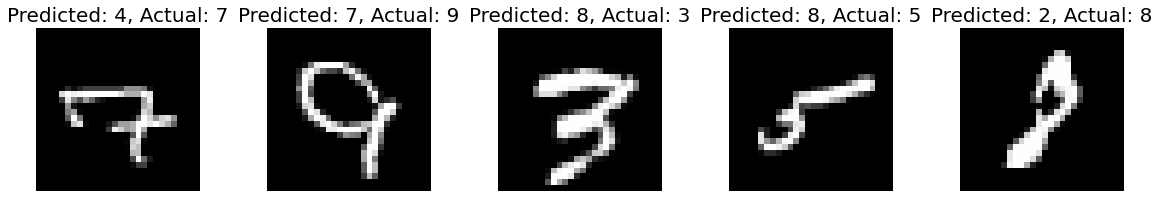

In [26]:
plt.figure(figsize=(20,3))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.axis("off")
    plt.imshow(np.array(X_test.iloc[badIndex, :]).reshape(28, 28), cmap=plt.cm.gray, interpolation='nearest')
    plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex], np.array(y_test)[badIndex]), fontsize = 20)

The last number are ambiguous, even to humans; is it a 2 or a 8? It’s debatable, but the algorithm thinks it’s a 2.

By discerning which images were misinterpreted, we can train the model further by

labelling them with the correct number they display and feeding them back into the model as a new training set. 

This will make the model more accurate, so the cycle of learn, predict, correct continues and the predictions become more accurate.